# Lab 1 — Peak Detection
## Plot sensor data

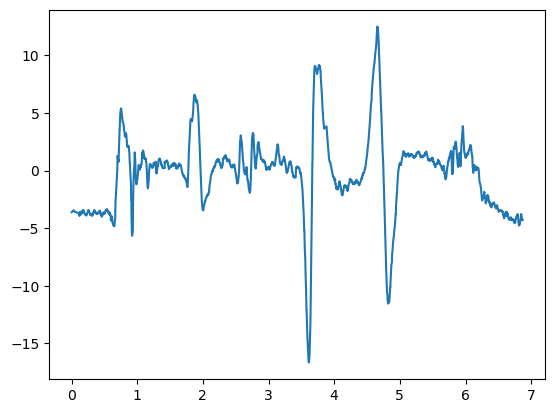

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

csv_filename = 'sample_sensor_data.csv'
data = np.genfromtxt(csv_filename, delimiter=',').T
timestamps = (data[0] - data[0, 0]) / 1000

accel_data = data[1:4]
gyro_data = data[4:-1]

plt.plot(timestamps, accel_data[0])
plt.show()

## Assignment 1: Maximum point

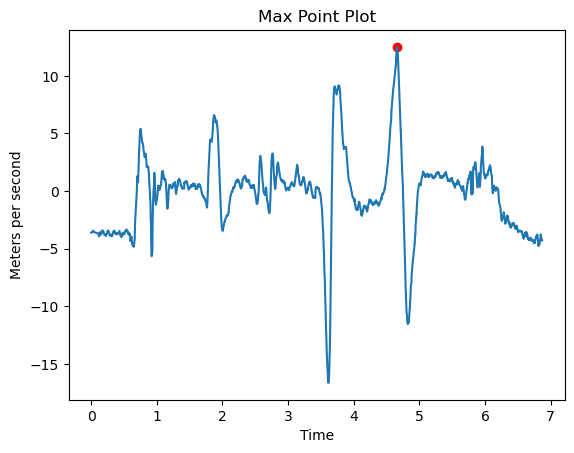

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Load CSV data
csv_filename = 'sample_sensor_data.csv'
data = np.genfromtxt(csv_filename, delimiter=',').T
timestamps = (data[0] - data[0, 0]) / 1000 
accel_data = data[1:4]
gyro_data = data[4:-1]

# Find the peak
def peak_detection(t, sig):
    peaks = []
    max_val = -np.Inf
    N = len(sig)

    for i in range(N):
        if sig[i] > max_val:
            max_val = sig[i]
            position = t[i]

    peaks.append((position, max_val))
    return np.array(peaks)

max_peaks = peak_detection(timestamps, accel_data[0])

# Plot
plt.plot(timestamps, accel_data[0])
plt.scatter(max_peaks[:,0], max_peaks[:,1], color = 'red')
plt.title("Max Point Plot")
plt.xlabel("Time")
plt.ylabel("Meters per second")
plt.show()


## Assignment 2: local maximum point

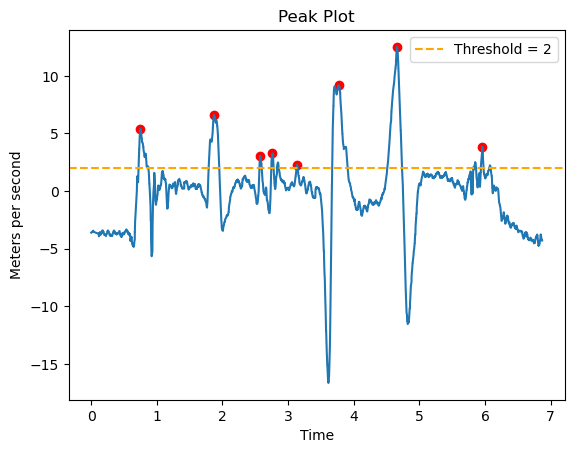

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Load CSV data
csv_filename = 'sample_sensor_data.csv'
data = np.genfromtxt(csv_filename, delimiter=',').T
timestamps = (data[0] - data[0, 0]) / 1000 
accel_data = data[1:4]
gyro_data = data[4:-1]

# Find the peaks using range-based maximum
def peak_detection(t, sig):
    peaks = []
    thres = 2
    window = 50  # window size for range
    N = len(sig)
    
    for i in range(window, N-window):
        if sig[i] > thres:
            local_range = sig[i-window:i+window+1]
            if sig[i] == np.max(local_range):
                if not peaks or abs(t[i] - peaks[-1][0]) > 0.1:  # 0.1 second minimum separation
                    peaks.append((t[i], sig[i]))
    
    return np.array(peaks)

max_peaks = peak_detection(timestamps, accel_data[0])

# Plot
plt.plot(timestamps, accel_data[0])
if len(max_peaks) > 0:
    plt.scatter(max_peaks[:,0], max_peaks[:,1], color = 'red')
plt.axhline(y=2, color='orange', linestyle='--', label='Threshold = 2')
plt.title("Peak Plot")
plt.xlabel("Time")
plt.ylabel("Meters per second")
plt.legend()
plt.show()